# Machine Learning using Python 
# Exam – Paper 
## Part I: Unsupervised Learning 
## Problem Statements & Tasks:
### Q1. What does the primary analysis of several categorical features reveal?
### Q2. Perform the following Exploratory Data Analysis tasks:
#### a. Missing Value Analysis
#### b. Outlier Treatment using the Z-score method
#### c. Deal with correlated variables
### Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained
### Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve
### Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

# Dataset Information:
## Column Description:
### Given the ‘credit_card’ dataset, below is the data definition:
#### 1) CUSTID: Identification of Credit Card holder (Categorical)
#### 2) BALANCE: Balance amount left in their account to make purchases
#### 3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
#### 4) PURCHASES: Amount of purchases made from account
#### 5) ONEOFFPURCHASES: Maximum purchase amount done in one-go
#### 6) INSTALLMENTSPURCHASES: Amount of purchase done in installment
#### 7) CASHADVANCE: Cash in advance given by the user
#### 8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
#### 9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
#### 10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
#### 11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
#### 12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
#### 13) PURCHASESTRX: Number of purchase transactions made
#### 14) CREDITLIMIT: Limit of Credit Card for user
#### 15) PAYMENTS: Amount of Payment done by user
#### 16) MINIMUM_PAYMENTS: Minimum amount of payments made by user
#### 17) PRCFULLPAYMENT: Percent of full payment paid by user
#### 18) TENURE: Tenure of credit card service for user

# Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
%matplotlib inline

# Importing the necessary Datasets:

In [92]:
# Importing the Dataset
df=pd.read_csv('credit_card.csv')

In [93]:
# Checking Dataset
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [94]:
# Getting a sample of 10 rows from the dataset
df.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5270,C15418,2701.540547,1.000000,0.00,0.00,0.00,932.369762,0.000000,0.000000,0.000000,0.250000,4,0,3000.0,1065.255189,1135.449267,0.000000,12
3847,C13955,1129.284728,1.000000,1211.42,0.00,1211.42,0.000000,1.000000,0.000000,1.000000,0.000000,0,42,4000.0,3390.831252,341.402204,0.333333,12
8014,C18231,0.004816,0.545455,51.70,0.00,51.70,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,3000.0,33.249088,0.059481,0.000000,12
2719,C12797,210.618047,1.000000,290.00,0.00,290.00,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,2700.0,239.005926,171.362848,0.000000,12
8652,C18888,267.401555,1.000000,156.60,0.00,156.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,157.691576,1221.503449,0.000000,12
7299,C17496,283.691223,1.000000,45.65,45.65,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1000.0,165.821773,252.475990,0.000000,12
1350,C11396,7886.875682,1.000000,968.26,734.32,233.94,3528.821853,0.916667,0.916667,0.416667,0.416667,15,35,9500.0,2016.609163,2885.448440,0.000000,12
3780,C13888,1432.350154,1.000000,0.00,0.00,0.00,353.621982,0.000000,0.000000,0.000000,0.416667,7,0,1500.0,525.178843,540.921834,0.000000,12
5305,C15455,6.420394,0.363636,136.72,0.00,136.72,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,2500.0,361.012758,169.705471,0.800000,12
3816,C13924,396.376998,1.000000,286.74,52.49,234.25,0.000000,0.750000,0.083333,0.666667,0.000000,0,15,1000.0,232.783063,187.565813,0.000000,12


In [95]:
# Checking the Shape of Dataset
df.shape 

(8950, 18)

In [96]:
# Checking the spread of the dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [97]:
# Checking the spread of all the columns of the dataset
df.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [98]:
# Checking for data correlation 
df.corr() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In [99]:
# Getting detail on the feature of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

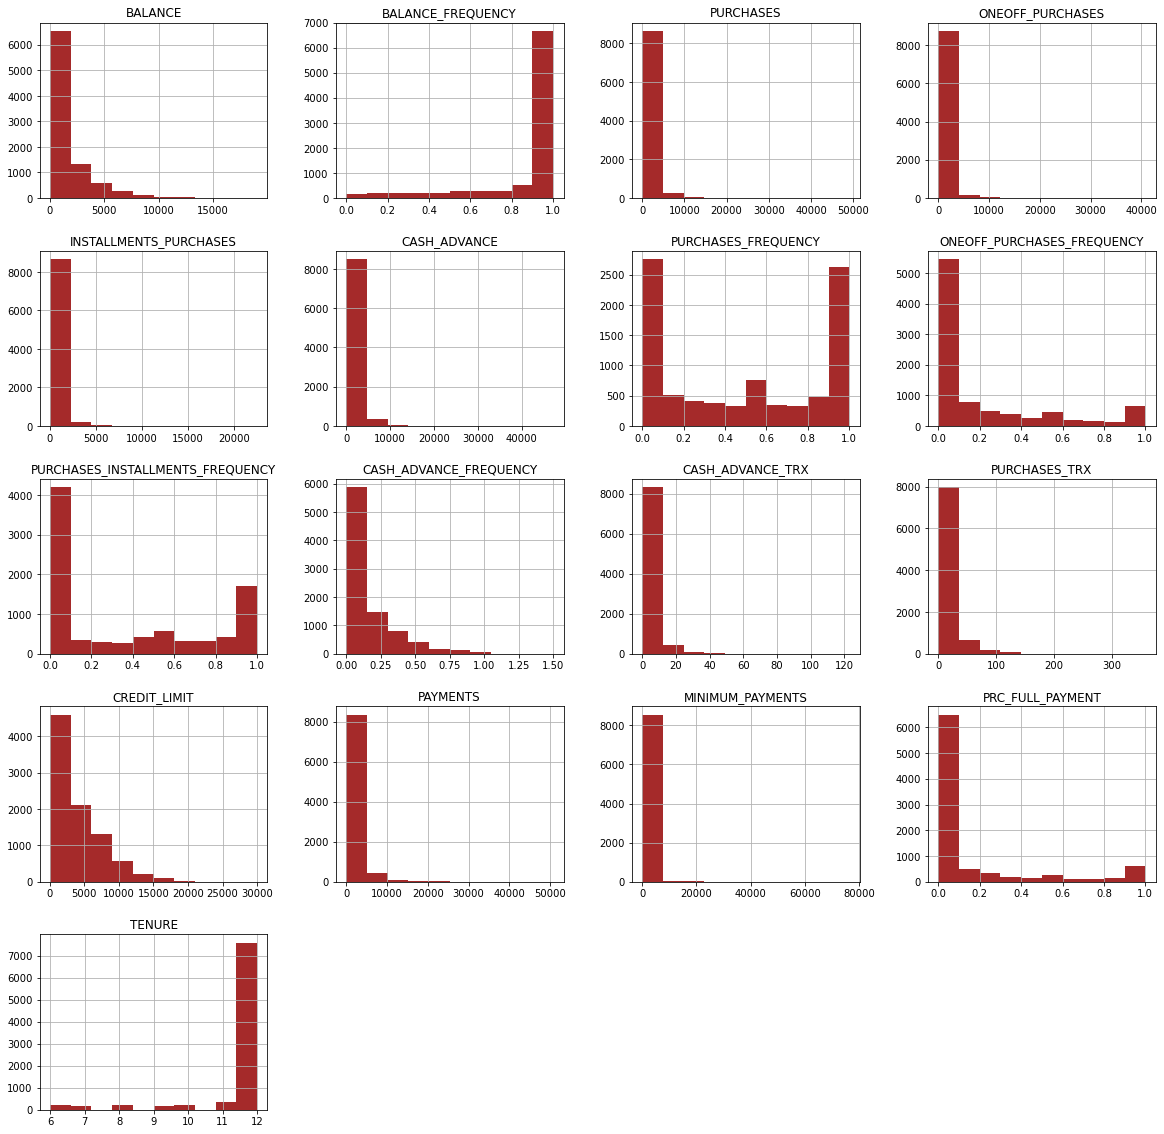

In [100]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20),color="brown")

<AxesSubplot:>

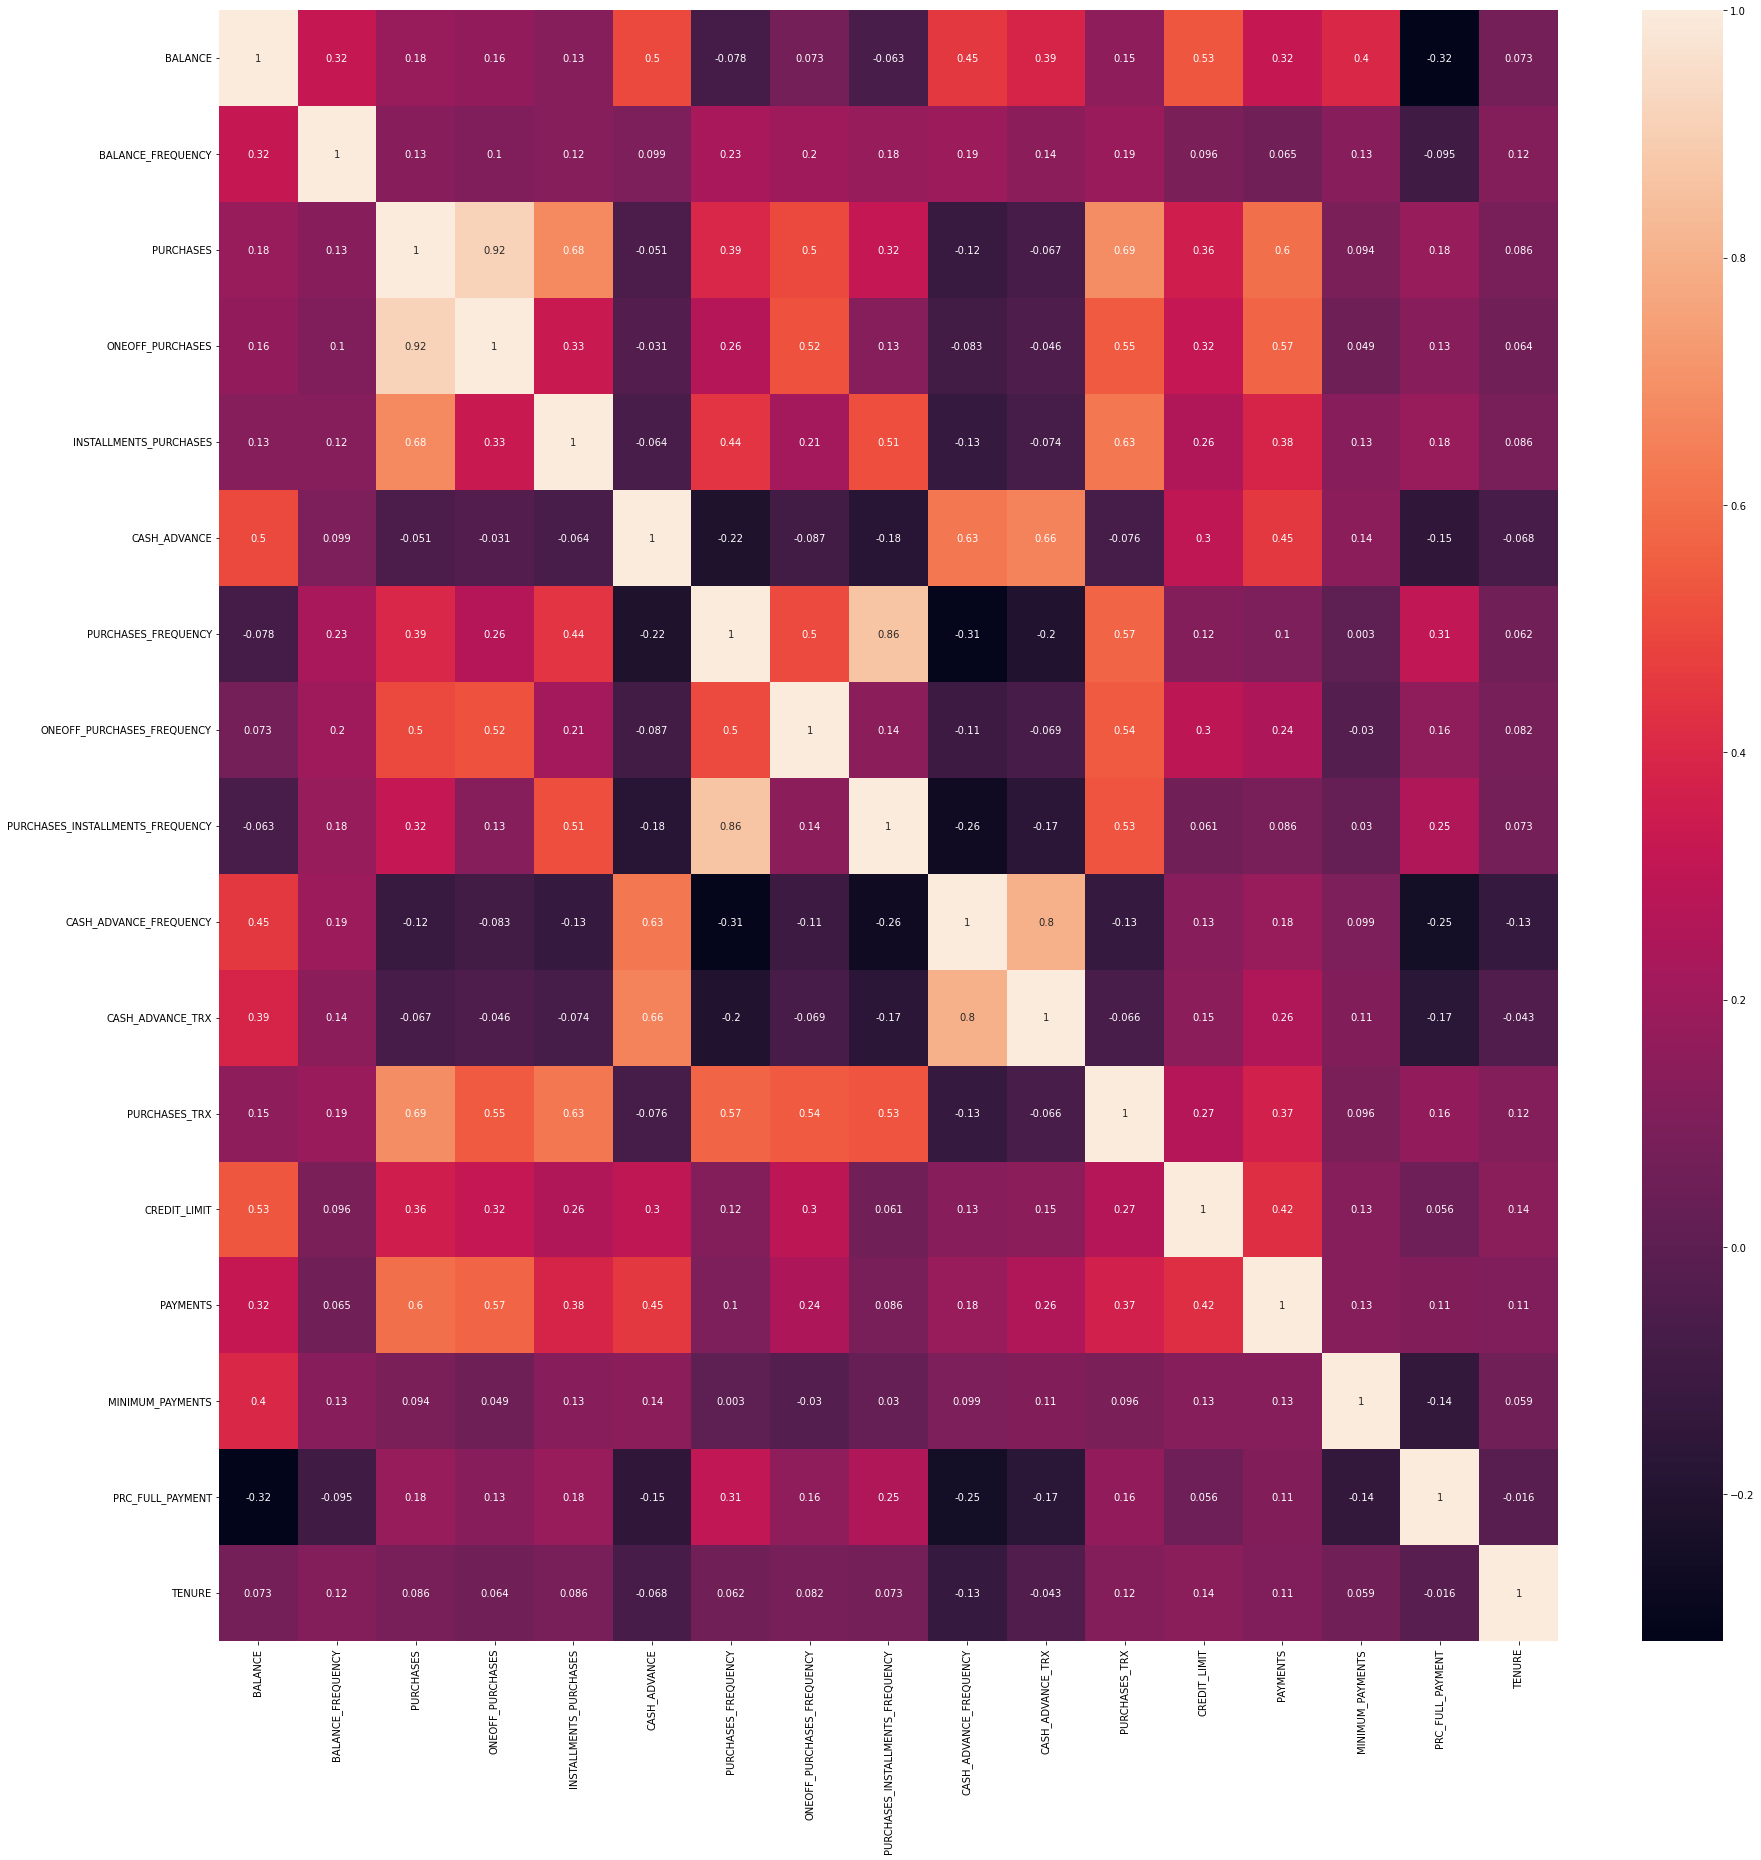

In [101]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

### The dataframe has a unique form of correlation.

# The format of Dataset is Understood

# Task Q1: What does the primary analysis of several categorical features reveal?

In [102]:
# Dropping Column CUST_ID since it is irrelevant in this problem statement
df.drop('CUST_ID',inplace=True, axis=1)

# Task Q2. Perform the following Exploratory Data Analysis tasks:

# Exploratory Data Analysis:

# Task Q2.a. Missing Value Analysis:

In [103]:
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

BALANCE = 0 float64
BALANCE_FREQUENCY = 0 float64
PURCHASES = 0 float64
ONEOFF_PURCHASES = 0 float64
INSTALLMENTS_PURCHASES = 0 float64
CASH_ADVANCE = 0 float64
PURCHASES_FREQUENCY = 0 float64
ONEOFF_PURCHASES_FREQUENCY = 0 float64
PURCHASES_INSTALLMENTS_FREQUENCY = 0 float64
CASH_ADVANCE_FREQUENCY = 0 float64
CASH_ADVANCE_TRX = 0 int64
PURCHASES_TRX = 0 int64
CREDIT_LIMIT = 1 float64
PAYMENTS = 0 float64
MINIMUM_PAYMENTS = 313 float64
PRC_FULL_PAYMENT = 0 float64
TENURE = 0 int64


<AxesSubplot:>

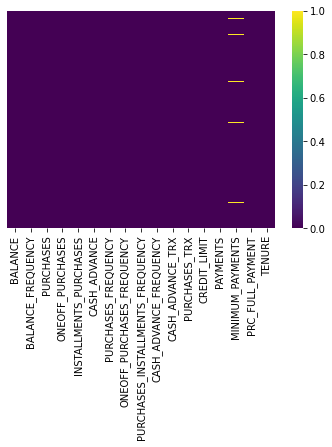

In [104]:
# Checking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

## We can see that there are missing values in the Dataset.

In [105]:
# Treating Missing Values:
for i in df.columns:
    if df[i].dtype in ["int64","float64"]:
        df[i].fillna(df[i].median(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)

<AxesSubplot:>

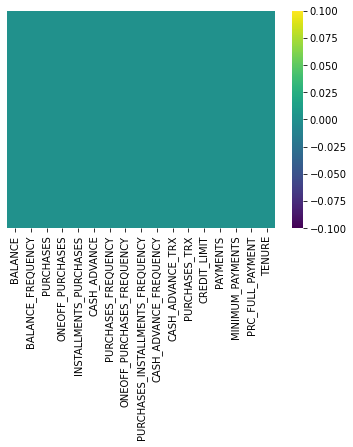

In [106]:
# Rechecking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

# Missing Values are been treated

# Task Q2.b. Outlier Treatment using the Z-score method

In [107]:
def zscore_outliers(data_1):
    outliers=[]    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return len(outliers)

In [108]:
col=df.columns

In [109]:
for i in col:
    print('No. of outliers ', i, '=', zscore_outliers(df[i]))

No. of outliers  BALANCE = 196
No. of outliers  BALANCE_FREQUENCY = 176
No. of outliers  PURCHASES = 135
No. of outliers  ONEOFF_PURCHASES = 122
No. of outliers  INSTALLMENTS_PURCHASES = 137
No. of outliers  CASH_ADVANCE = 182
No. of outliers  PURCHASES_FREQUENCY = 0
No. of outliers  ONEOFF_PURCHASES_FREQUENCY = 0
No. of outliers  PURCHASES_INSTALLMENTS_FREQUENCY = 0
No. of outliers  CASH_ADVANCE_FREQUENCY = 199
No. of outliers  CASH_ADVANCE_TRX = 172
No. of outliers  PURCHASES_TRX = 185
No. of outliers  CREDIT_LIMIT = 152
No. of outliers  PAYMENTS = 159
No. of outliers  MINIMUM_PAYMENTS = 102
No. of outliers  PRC_FULL_PAYMENT = 0
No. of outliers  TENURE = 394


In [110]:
# Dealing with Outliers:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df_out=df=cap_data(df)

capping the  BALANCE
capping the  BALANCE_FREQUENCY
capping the  PURCHASES
capping the  ONEOFF_PURCHASES
capping the  INSTALLMENTS_PURCHASES
capping the  CASH_ADVANCE
capping the  PURCHASES_FREQUENCY
capping the  ONEOFF_PURCHASES_FREQUENCY
capping the  PURCHASES_INSTALLMENTS_FREQUENCY
capping the  CASH_ADVANCE_FREQUENCY
capping the  CASH_ADVANCE_TRX
capping the  PURCHASES_TRX
capping the  CREDIT_LIMIT
capping the  PAYMENTS
capping the  MINIMUM_PAYMENTS
capping the  PRC_FULL_PAYMENT
capping the  TENURE


C:\Users\roshs\AppData\Local\Temp/ipykernel_11476/3451799431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\roshs\AppData\Local\Temp/ipykernel_11476/3451799431.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\roshs\AppData\Local\Temp/ipykernel_11476/3451799431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

# Outlier Treatment using the Z-score method is done.

# Task Q2.c. Deal with correlated variables

<AxesSubplot:>

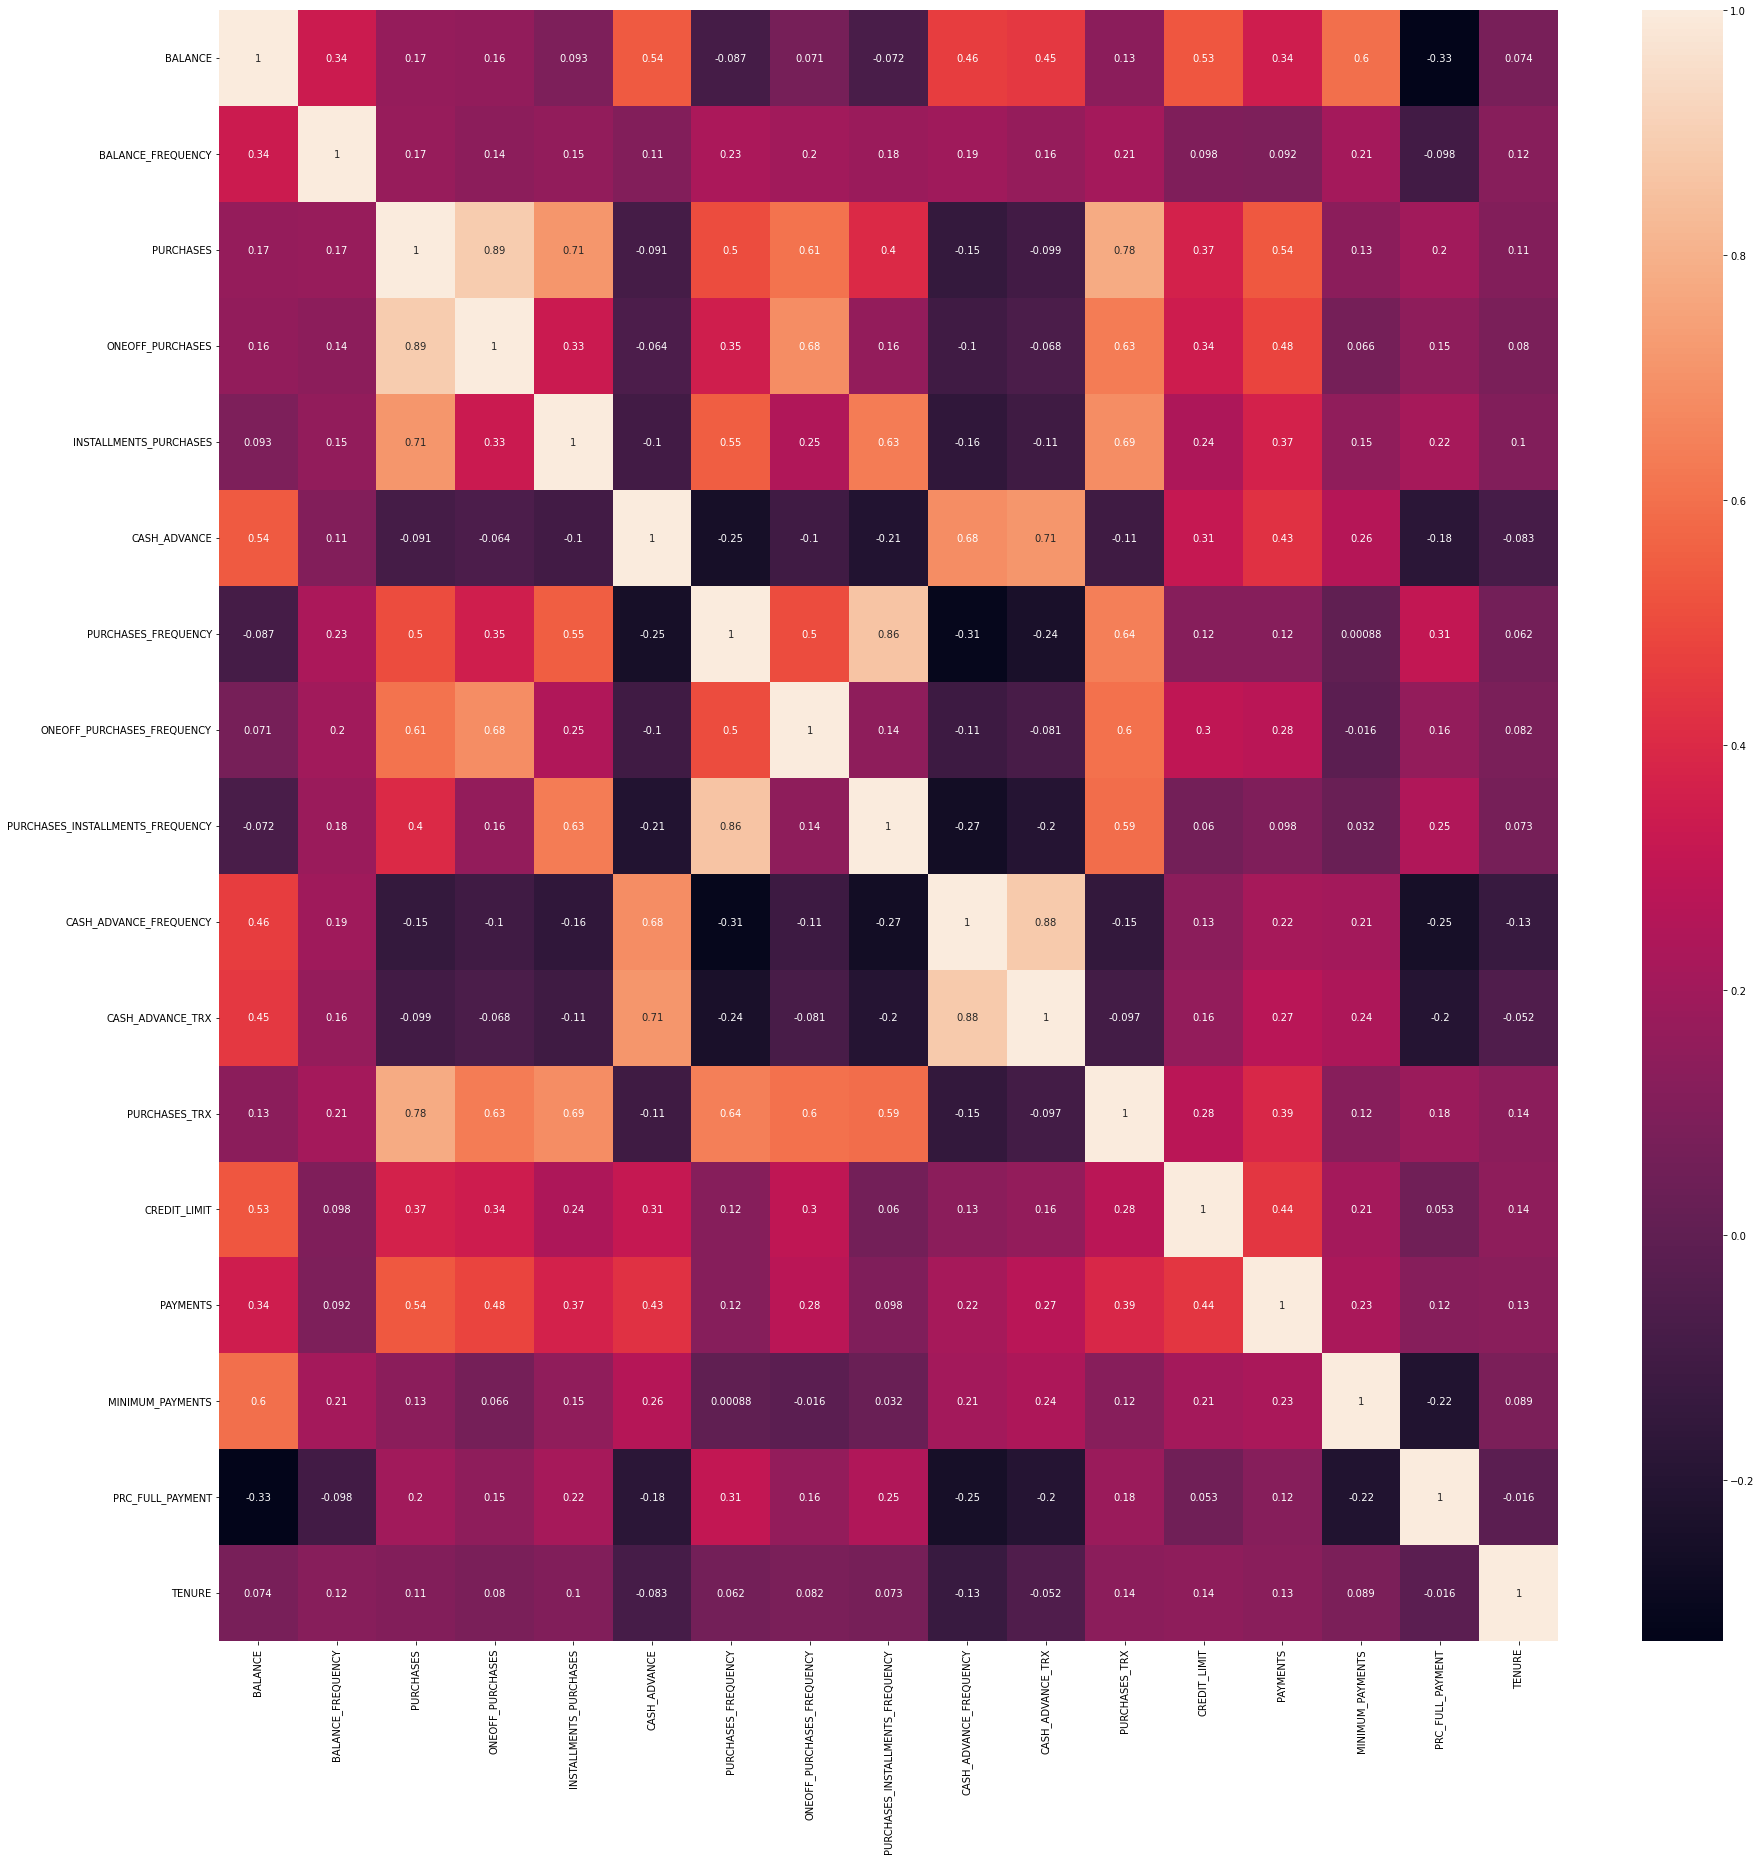

In [111]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

# Dealt with correlated variables

# Task Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [113]:
# Checking for Unique Values in the dataset
for col in df.columns:
    print(col,'=',df[col].nunique())

BALANCE = 8772
BALANCE_FREQUENCY = 42
PURCHASES = 6114
ONEOFF_PURCHASES = 3925
INSTALLMENTS_PURCHASES = 4363
CASH_ADVANCE = 4234
PURCHASES_FREQUENCY = 47
ONEOFF_PURCHASES_FREQUENCY = 47
PURCHASES_INSTALLMENTS_FREQUENCY = 47
CASH_ADVANCE_FREQUENCY = 40
CASH_ADVANCE_TRX = 30
PURCHASES_TRX = 116
CREDIT_LIMIT = 182
PAYMENTS = 8622
MINIMUM_PAYMENTS = 8458
PRC_FULL_PAYMENT = 47
TENURE = 7


In [114]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [115]:
dfScaled=df

In [116]:
covMatrix = np.cov(dfScaled,rowvar=False)
print(covMatrix)

[[ 3.86750566e+06  1.54860398e+02  4.96997262e+05  3.34540803e+05
   1.24180802e+05  1.89008847e+06 -6.88241379e+01  4.15363265e+01
  -5.62845283e+01  1.78299917e+02  4.84233430e+03  5.49596208e+03
   3.69411990e+06  1.52656925e+06  1.44368588e+06 -1.90756086e+02
   1.95085280e+02]
 [ 1.54860398e+02  5.47708366e-02  6.08640133e+01  3.53989708e+01
   2.43312835e+01  4.47941347e+01  2.18762035e-02  1.41626744e-02
   1.66936393e-02  8.87351339e-03  2.10479065e-01  1.04302223e+00
   8.18280802e+01  4.87392076e+01  6.09167246e+01 -6.71121147e-03
   3.80631649e-02]
 [ 4.96997262e+05  6.08640133e+01  2.32618983e+06  1.48192869e+06
   7.31017144e+05 -2.46907268e+05  3.08664662e+02  2.76810381e+02
   2.42983824e+02 -4.45643097e+01 -8.38235075e+02  2.49636507e+04
   1.99028411e+06  1.84166590e+06  2.49483995e+05  9.05108498e+01
   2.18944676e+02]
 [ 3.34540803e+05  3.53989708e+01  1.48192869e+06  1.20321925e+06
   2.47622778e+05 -1.25043679e+05  1.54042857e+02  2.23778979e+02
   6.92714971e+01 -

In [117]:
pca = PCA(n_components=5)
pca.fit(dfScaled)

PCA(n_components=5)

In [118]:
print(pca.explained_variance_)

[16932237.94126013  4486146.99146783  4372523.7746095   2285192.09213961
  1029698.80472405]


In [119]:
print(pca.components_)

[[ 3.24032582e-01  9.83199564e-06  1.80449431e-01  1.20016717e-01
   5.23026244e-02  2.05623571e-01  1.18879291e-05  2.38286896e-05
   6.80261190e-06  1.24246214e-05  3.98443699e-04  1.86542927e-03
   8.13678159e-01  3.60221118e-01  1.05760187e-01  4.54907458e-07
   4.63476483e-05]
 [-1.89235140e-01  2.91080454e-06  4.72955149e-01  3.08395340e-01
   1.44523358e-01 -7.20403776e-02  5.65183107e-05  4.83226083e-05
   4.70456074e-05 -1.15015125e-05 -1.84984081e-04  4.86757934e-03
  -3.70927162e-01  6.93818041e-01 -1.80226081e-02  3.13193120e-05
   3.17084565e-05]
 [ 4.76557279e-01  1.67752891e-05 -2.48896315e-01 -1.67411854e-01
  -7.73541894e-02  6.21328131e-01 -6.85366717e-05 -4.74407320e-05
  -4.84554606e-05  5.65703578e-05  1.58597495e-03 -2.85910291e-03
  -4.04246179e-01  2.45324194e-01  2.59374433e-01 -4.71030803e-05
  -5.80067107e-05]
 [ 5.63442128e-01  4.42428897e-05  3.51388478e-01  2.14321182e-01
   1.16477660e-01 -3.92145387e-01  5.58930894e-05  3.64107172e-05
   4.87540416e-05 -

In [120]:
a=pca.explained_variance_ratio_

In [121]:
x=0
for i in a:
    x=x+i
print(x)

0.9635099894399868


### When 4 columns were take only 92.9423% variables were explained, so we went with 5 columns to have above 95% of Variable to be explained

In [122]:
print(pca.explained_variance_ratio_)

[0.56051992 0.14850812 0.14474677 0.07564834 0.03408685]


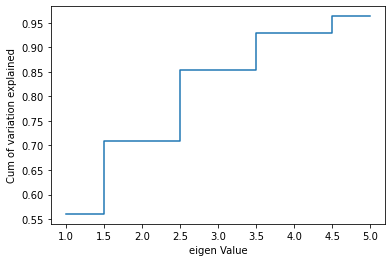

In [123]:
plt.step(list(range(1,6)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

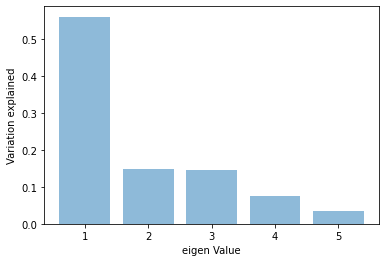

In [124]:
plt.bar(list(range(1,6)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [125]:
pca5 = PCA(n_components=5)
pca5.fit(dfScaled)
print(pca5.components_)
print(pca5.explained_variance_ratio_)
dfpca = pca5.transform(dfScaled)

[[ 3.24032582e-01  9.83199564e-06  1.80449431e-01  1.20016717e-01
   5.23026244e-02  2.05623571e-01  1.18879291e-05  2.38286896e-05
   6.80261190e-06  1.24246214e-05  3.98443699e-04  1.86542927e-03
   8.13678159e-01  3.60221118e-01  1.05760187e-01  4.54907458e-07
   4.63476483e-05]
 [-1.89235140e-01  2.91080454e-06  4.72955149e-01  3.08395340e-01
   1.44523358e-01 -7.20403776e-02  5.65183107e-05  4.83226083e-05
   4.70456074e-05 -1.15015125e-05 -1.84984081e-04  4.86757934e-03
  -3.70927162e-01  6.93818041e-01 -1.80226081e-02  3.13193120e-05
   3.17084565e-05]
 [ 4.76557279e-01  1.67752891e-05 -2.48896315e-01 -1.67411854e-01
  -7.73541894e-02  6.21328131e-01 -6.85366717e-05 -4.74407320e-05
  -4.84554606e-05  5.65703578e-05  1.58597495e-03 -2.85910291e-03
  -4.04246179e-01  2.45324194e-01  2.59374433e-01 -4.71030803e-05
  -5.80067107e-05]
 [ 5.63442128e-01  4.42428897e-05  3.51388478e-01  2.14321182e-01
   1.16477660e-01 -3.92145387e-01  5.58930894e-05  3.64107172e-05
   4.87540416e-05 -

In [126]:
dfpca

array([[-4322.4824271 ,    41.60523988,   -83.28646844,  -182.34499671,
           44.7948706 ],
       [ 4390.61385073,  -615.37532744,  4231.24232116, -2753.433106  ,
        -1070.8926784 ],
       [ 2174.78289227, -2005.7969984 , -1602.46075245,   638.553385  ,
           97.72724319],
       ...,
       [-4366.1994108 ,    -7.40968045,  -151.99910007,  -157.28821068,
          -51.71925284],
       [-4815.52602728,    68.66622666,   101.26807344,  -167.46181439,
          -67.53493338],
       [-3775.14518773,   595.61837894,  -398.43445713,   516.99106328,
         -953.05747655]])

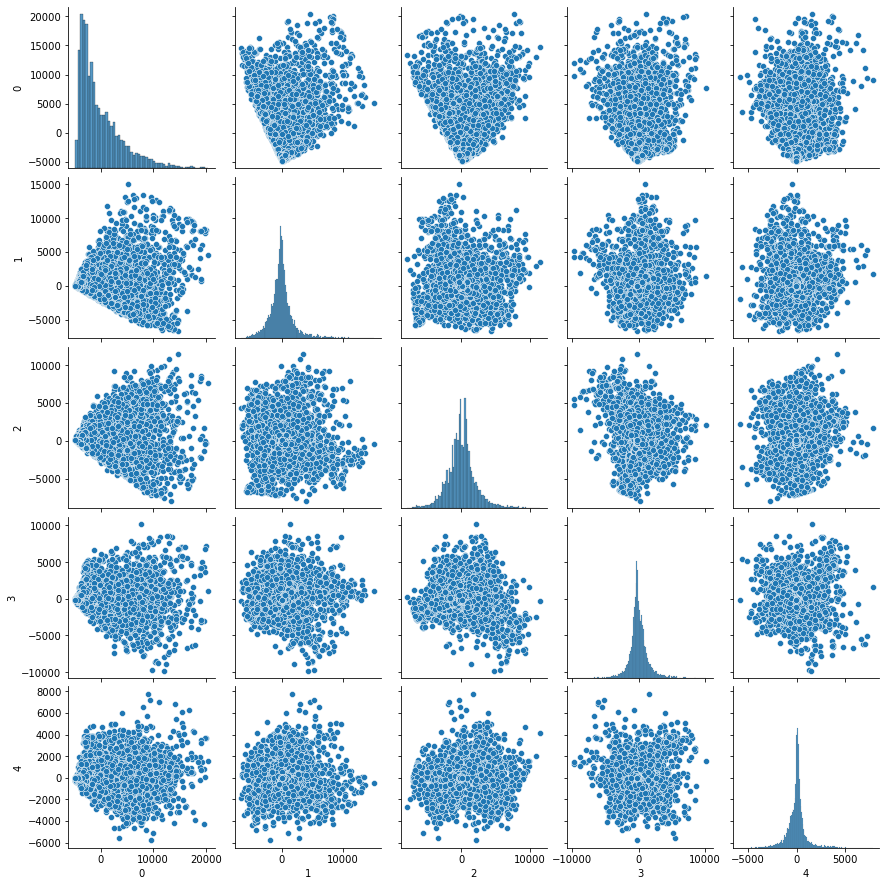

In [127]:
sns.pairplot(pd.DataFrame(dfpca))

# Performed dimensionality reduction using PCA such that the 95% of the variance is explained

# Task Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [128]:
df = pd.DataFrame(dfpca)

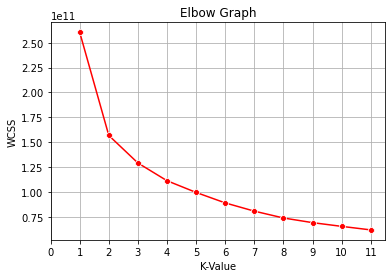

In [130]:
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,12), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

# Found the optimum value of k for k-means clustering using the elbow method to be 4 & the elbow curve is ploted

# Task Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [129]:
# create a list for different values of K
n_clusters = [3, 4, 5, 6, 7, 8, 9]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters :
    cluster = KMeans (n_clusters= K)
    predict = cluster.fit_predict(df)
    
    score = silhouette_score(df, predict)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 3, silhouette score is 0.39565191760128676)
For n_clusters = 4, silhouette score is 0.4036323856451962)
For n_clusters = 5, silhouette score is 0.36216414413145664)
For n_clusters = 6, silhouette score is 0.3953677799848545)
For n_clusters = 7, silhouette score is 0.3675753418353913)
For n_clusters = 8, silhouette score is 0.34943567956307753)
For n_clusters = 9, silhouette score is 0.33095632212785475)


**The optimum value for K is associated with the high value of the 'silhouette score'. From the above output it can be seen that, for K = 4, the silhouette score is highest. Thus, we build the clusters with K = 4**

In [132]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 4)

# fit the model
model.fit(df)

KMeans(n_clusters=4)

In [133]:
data_output = df_out.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12,0


In [134]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)  

(array([0, 1, 2, 3]), array([5561,  427, 2214,  748], dtype=int64))

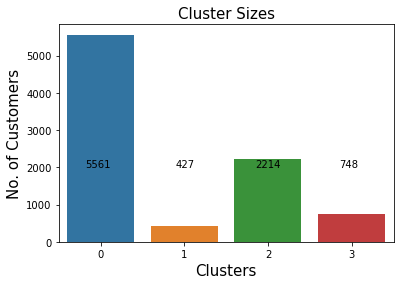

In [135]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][3])

plt.show()

# Found the optimum value of k for k-means clustering using the silhouette score method to be 4 and have specified the number of observations in each cluster using a bar plot.

# Part I Completed Successfully